# 统计模块

In [22]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
dat = sm.datasets.get_rdataset("Guerry", "HistData").data
dat.head(5)

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [2]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 23 columns):
dept               86 non-null int64
Region             85 non-null object
Department         86 non-null object
Crime_pers         86 non-null int64
Crime_prop         86 non-null int64
Literacy           86 non-null int64
Donations          86 non-null int64
Infants            86 non-null int64
Suicides           86 non-null int64
MainCity           86 non-null object
Wealth             86 non-null int64
Commerce           86 non-null int64
Clergy             86 non-null int64
Crime_parents      86 non-null int64
Infanticide        86 non-null int64
Donation_clergy    86 non-null int64
Lottery            86 non-null int64
Desertion          86 non-null int64
Instruction        86 non-null int64
Prostitutes        86 non-null int64
Distance           86 non-null float64
Area               86 non-null int64
Pop1831            86 non-null float64
dtypes: float64(2), int64(18), object(3

In [9]:
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Tue, 26 Dec 2017   Prob (F-statistic):           1.90e-08
Time:                        12:02:55   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233      6.995      0.000     176.358     316.510
Literacy           -0.4889      0.128     -3.832      0.000      -0.743      -0.235
np.log(Pop1831)   -31.3114      5.977     -5.239      0.000     -43.199     -19.424
==============================================================================
Omnibus:                        3.713   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                3.394
Skew:                          -0.487   Prob(JB):                        0.183
Kurtosis:                       3.003   Cond. No.                         702.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [12]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [26]:
d = pd.DataFrame([x,y]).T
d

,0,1
0,0.000000,0.282508
1,0.101010,2.702766
2,0.202020,0.484319
3,0.303030,1.997516
4,0.404040,2.164672
5,0.505051,4.531741
6,0.606061,4.333122
7,0.707071,7.036793
8,0.808081,7.545954
9,0.909091,7.947471


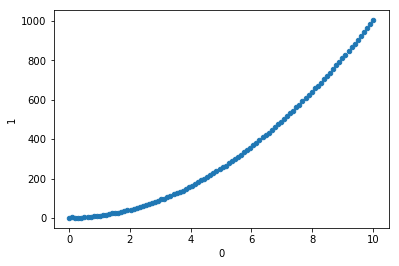

In [32]:
d.plot.scatter(x=0,y=1)